In [2]:
import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import numpy as np

import os

In [9]:
def load_model(model_filepath):
    """
    This function takes the path to the model file and loads it.

    Args:
        model_filepath (string): String representing the path to the model file.

    Returns:
        model: Loaded model.
    """
    # Hyperparameters
#     optimizer = 'adam'
#     bc_loss = 'binary_crossentropy'
#     metrics = ['binary_accuracy']
    
    model = keras.models.load_model(model_filepath)
    return model
    
    
def load_and_process_image(img_name):
    """
    This function take the name of the image and returns loaded image.

    Args:
        img_name (tf.string): String representing the name of image.

    Returns:
        image: Loaded image.
    """
    full_path = './images/' + img_name
    image = tf.io.read_file(full_path)
    image = tf.io.decode_jpeg(contents=image, channels=3)
    image = tf.cast(image, tf.float32)
    image = tf.divide(image, 255.)
    image = tf.image.resize(image, size=(112, 112))
    return image
    
    
def get_label_string(label):
    '''
    This function return string representation of label list
    
    Params:
        label (list) : A onehot representation of labels
        
    Return:
        joined by \n string from every element of list
    '''
    attr2idx = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
#     print(label)
    true_label = np.array(attr2idx)[label==1]
    return ', '.join(true_label)

def plot_prediction(image, preds):
    '''
    This function plot the images one by one in 1x5 grid with string representation of label as title of
    respective image.
    
    Args:
        images (np.ndarray) : images to plot
        labesl (np.ndarray) : labels to plot as title
        pred_labels (nd.ndarray) : predicted labels to compare with true labels
    '''
    
    _ = plt.figure(figsize=(4, 4))
    print('-----------------------')
    print('Predicted Attributes:', get_label_string(preds[0]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print('-----------------------')

def predict(model, imagename):
    # Tuning Parameter
    threshold = 0.4

    image = load_and_process_image(imagename)
#     image_array = image.numpy()
    image = np.reshape(image, (1, 112, 112, 3))
    # Predicting Labels
    preds = model.predict(image)
    print(sum(preds[0]))

    # Changing Predicted labels to One-Hot
    preds[preds >= threshold] = 1
    preds[preds < threshold] = 0

    # Plotting
    plot_prediction(image[0], preds)

In [4]:
model = load_model('model_vggface_v1.h5')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 40)                81960     
                                                                 
 activation (Activation)     (None, 40)                0         
                                                                 
Total params: 23,669,672
Trainable params: 81,960
Non-trainable params: 23,587,712
_________________________________________________________________


1/1 [==============================] - 0s 21ms/step
7.476229768246412
-----------------------
Predicted Attributes: Male, No_Beard, Young


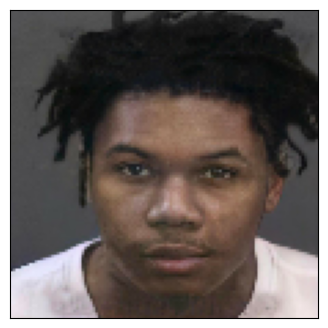

-----------------------


In [10]:
predict(model, 'kankan.jpg')